In [1]:
import pandas as pd 
data= pd.read_csv('train.csv')
print(data)

       User_ID                                        Description  \
0      id10326  The room was kind of clean but had a VERY stro...   
1      id10327  I stayed at the Crown Plaza April -- - April -...   
2      id10328  I booked this hotel through Hotwire at the low...   
3      id10329  Stayed here with husband and sons on the way t...   
4      id10330  My girlfriends and I stayed here to celebrate ...   
...        ...                                                ...   
38927  id49253  We arrived late at night and walked in to a ch...   
38928  id49254  The only positive impression is location and p...   
38929  id49255  Traveling with friends for shopping and a show...   
38930  id49256  The experience was just ok. We paid extra for ...   
38931  id49257  The Westin is a wonderfully restored grande da...   

            Browser_Used Device_Used Is_Response  
0                   Edge      Mobile   not happy  
1      Internet Explorer      Mobile   not happy  
2                M

In [2]:
data.shape

(38932, 5)

In [3]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
data.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id26364,1
Description,38932,38932,The hotel is an excellent choice most of all d...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [5]:
#Data Cleaning
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
print('missing values of the columns count and percentage :')
missing_data

missing values of the columns count and percentage :


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Default %

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


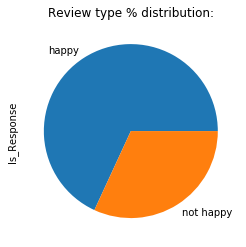

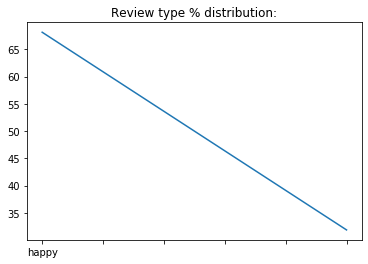

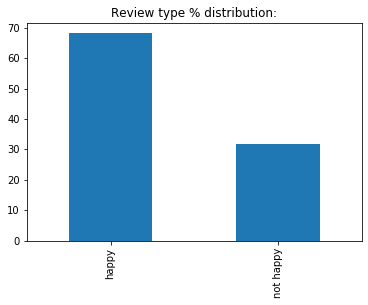

In [9]:
### Distribution of the review ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Default %\n')
print(round(data.Is_Response.value_counts(normalize=True)*100,2))
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='pie')
plt.title('Review type % distribution:')
plt.show()
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='line')
plt.title('Review type % distribution:')
plt.show()
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Review type % distribution:')
plt.show()

In [ ]:
#Removing columns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [10]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [12]:
# Let's take a look at the updated text
data['cleaned_description'] = pd.DataFrame(data.Description.apply(cleaned1))
data.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,cleaned_description
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april april th...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy,we had rooms one was very nice and clearly ha...
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy,my husband and i have stayed in this hotel a f...
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy,my wife i stayed in this glorious city a whil...
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy,my boyfriend and i stayed at the fairmont on a...
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy,wonderful staff great location but it was defi...


In [15]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [16]:
# Let's take a look at the updated text
data['cleaned_description_new'] = pd.DataFrame(data['cleaned_description'].apply(cleaned2))
data.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,cleaned_description,cleaned_description_new
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [25]:
#Model training
from sklearn.model_selection import train_test_split

Independent_var = data.cleaned_description_new
Dependent_var = data.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfid = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")
from sklearn.pipeline import Pipeline

In [24]:
model = Pipeline([('vectorizer',tfid),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2418,  305],
       [ 153, 1018]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


In [21]:
comment = ["i am good at writing"]
res = model.predict(comment)
print(res)

['happy']
